# ⚙️ Workflows

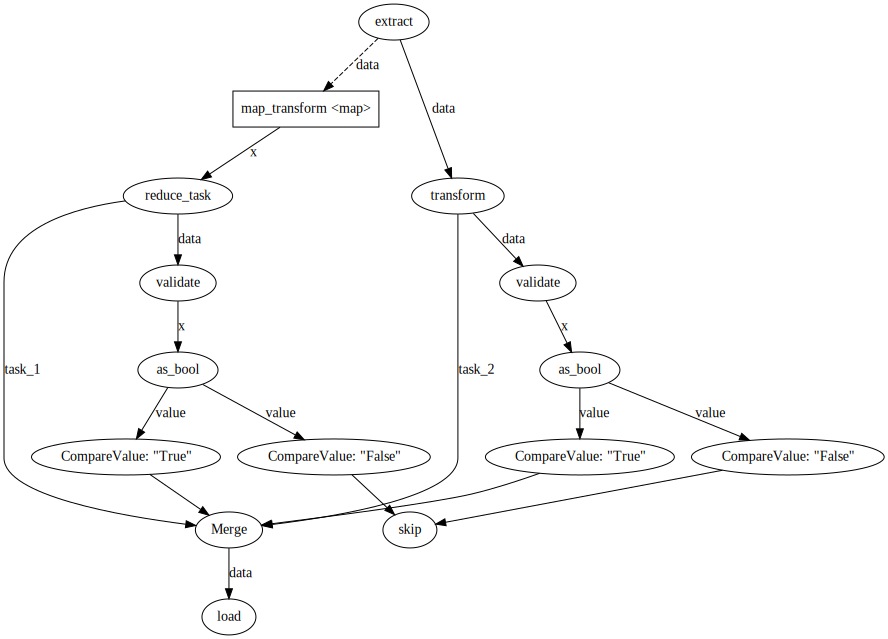

In [20]:
from prefect import Flow, Parameter, task
from prefect.tasks.control_flow import ifelse, merge


@task
def extract():
    """Get a list of data"""
    return [1, 2, 3]


@task
def transform(data):
    """Multiply the input by 10"""
    return [i * 10 for i in data]


@task
def map_transform(data):
    """Multiply the input by 10"""
    return data * 10


@task
def reduce_task(x):
    return sum(x)


@task
def load(data):
    """Print the data to indicate it was received"""
    print("Here's your data: {}".format(data))


@task
def skip():
    # task which simply skips steps
    return


@task
def validate(data):
    # placeholder to validate input
    if isinstance(data, int):
        return True
    else:
        return False


with Flow("ETL with Mapping and ifelse") as flow:
    e = extract()
    t = transform(e)

    t_mapped = map_transform.map(e)
    t_reduced = reduce_task(t_mapped)

    merged = merge(t_reduced, t)

    ifelse(validate(t), merged, skip)
    ifelse(validate(t_reduced), merged, skip)

    l = load(merged)

flow.visualize()

[2021-01-17 10:28:27-0700] INFO - prefect.FlowRunner | Beginning Flow run for 'ETL with Mapping and ifelse'
[2021-01-17 10:28:27-0700] INFO - prefect.TaskRunner | Task 'extract': Starting task run...
[2021-01-17 10:28:27-0700] INFO - prefect.TaskRunner | Task 'extract': Finished task run for task with final state: 'Success'
[2021-01-17 10:28:27-0700] INFO - prefect.TaskRunner | Task 'transform': Starting task run...
[2021-01-17 10:28:27-0700] INFO - prefect.TaskRunner | Task 'transform': Finished task run for task with final state: 'Success'
[2021-01-17 10:28:27-0700] INFO - prefect.TaskRunner | Task 'map_transform': Starting task run...
[2021-01-17 10:28:27-0700] INFO - prefect.TaskRunner | Task 'map_transform': Finished task run for task with final state: 'Mapped'
[2021-01-17 10:28:28-0700] INFO - prefect.TaskRunner | Task 'map_transform[0]': Starting task run...
[2021-01-17 10:28:28-0700] INFO - prefect.TaskRunner | Task 'map_transform[0]': Finished task run for task with final stat

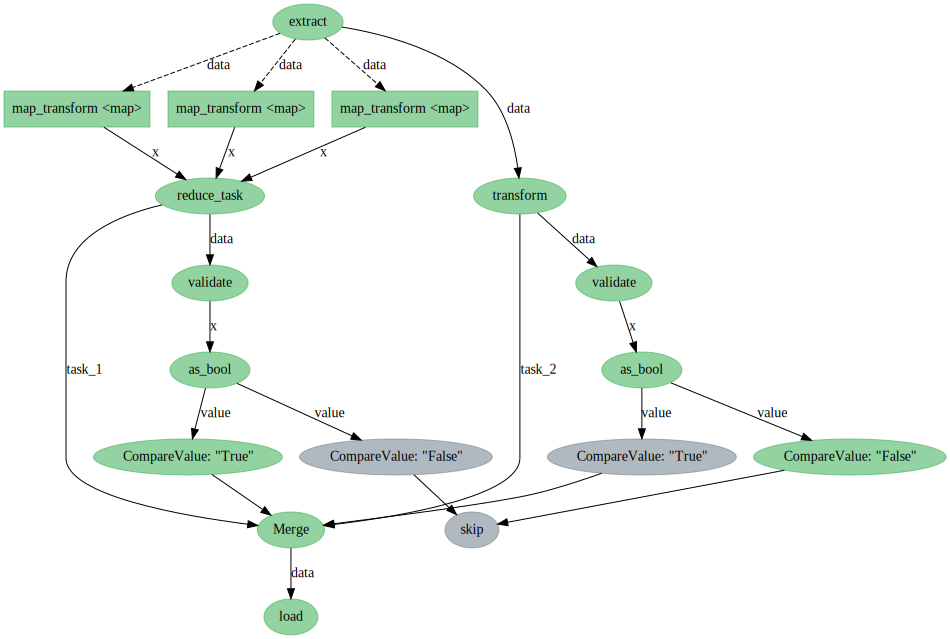

In [21]:
flow_state = flow.run()
flow.visualize(flow_state)